In [3]:
!pip install timm

In [4]:
#insrall opencv
!pip install opencv-python
#insall torch
!pip install torch torchvision torchaudio

In [5]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

('dog.jpg', <http.client.HTTPMessage at 0x7b3214698640>)

In [6]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /home/aayush-ubuntu/.cache/torch/hub/intel-isl_MiDaS_master
/home/aayush-ubuntu/miniconda3/envs/neat/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/aayush-ubuntu/miniconda3/envs/neat/lib/python3.13/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [7]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
    

In [8]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform


Using cache found in /home/aayush-ubuntu/.cache/torch/hub/intel-isl_MiDaS_master


In [9]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [10]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()


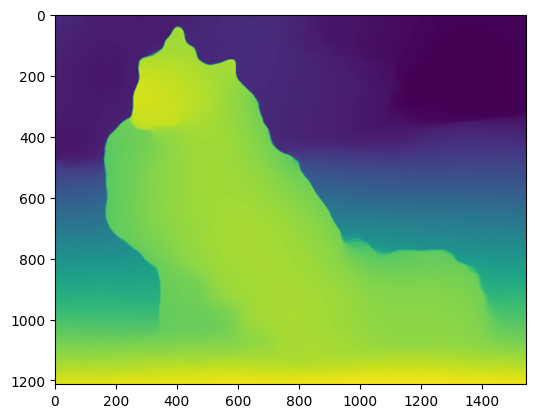

In [11]:
plt.imshow(output)

In [1]:
#B = (4pi*10^-7)/4pi*2mu/r^3 [3(m.r)r/r^2 - m]
import numpy as np
magnetic_strength  = MAGNET_STRENGTH = 1.3754903118788704e-07
dist = 4 #inches
dist *= 0.0254 #in meters
def magnetic_field(magnetic_moment, position):
    r = np.linalg.norm(position)
    if r == 0:
        return np.array([0.0, 0.0, 0.0])  # Avoid division by zero
    r_hat = position / r
    m_dot_r = np.dot(magnetic_moment, r_hat)
    B = (magnetic_strength / r**3) * (3 * m_dot_r * r_hat - magnetic_moment)
    return B

# Define the magnetic moment (assuming it's aligned along the z-axis)
magnetic_moment = np.array([0.0, 0.0, 1.0])  # Adjust the magnitude as needed
# Define the position where you want to calculate the magnetic field
position = np.array([0.0, 0.0, dist])  # 4 inches away along the z-axis
B = magnetic_field(magnetic_moment, position)
print("Magnetic Field (T):", B)


Magnetic Field (T): [0.        0.        0.0002623]
